In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [193]:
kill =pd.read_csv("/Users/bestecetin/Desktop/machine_learning/courses/datavisualization/(1) Seaborn/archive (8)/PoliceKillingsUS.csv",encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('/Users/bestecetin/Desktop/machine_learning/courses/datavisualization/(1) Seaborn/archive (8)/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('/Users/bestecetin/Desktop/machine_learning/courses/datavisualization/(1) Seaborn/archive (8)/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('/Users/bestecetin/Desktop/machine_learning/courses/datavisualization/(1) Seaborn/archive (8)/ShareRaceByCity.csv', encoding="windows-1252")

ilk inceleyeceğimiz data seti : percentage_people_below_poverty_level yani, <br>
yoksulluk seviyesinin altındaki insanların yüzdesi, <br>
Geographic Area	: eyaletlerimiz <br>
City: şehir <br>
poverty_rate: yoksulluk oranı

In [12]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [13]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [14]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

yoksulluk oranı 0'a eşit olan 1464 zengin varmış, <br>
"-" diye bir oranımız var bunun ne anlama geldiğini bilmiyoruz  detaylı bir şekilde inceleyip ne oldugunu anlayabiliriz fakat 0'a eşitleyeceğiz çünkü veri görselleştirme yapmak amacımız ve görmezden geleceğiz..

In [15]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace=True)

"-"i 0.0 yap ve bunu veri setine kaydet(inplace=True)

In [18]:
percentage_people_below_poverty_level.poverty_rate=percentage_people_below_poverty_level.poverty_rate.astype(float)

poverty_rate 'i veri setinde string olarak tanımlamışlar biz bunu floata çeviriyoruz.

her bir eyelatin fakirlik oranını hesaplamak için:

In [20]:
area_list=list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_list

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

unique olan eyaletler listeledik sayısına da bakalım:

In [21]:
len(list(percentage_people_below_poverty_level['Geographic Area'].unique()))

51

In [24]:
area_poverty_ratio=[]
for i in area_list:
    x=percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate=sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

area_list'in tuttuğu benzersiz(unique) eyaletleri veri setesinin içinde aradık, bunların ortalama yoksulluk oranını hesaplayıp bir list'e kaydettik.

In [31]:
data=pd.DataFrame({'area_list':area_list,'area_poverty_ratio':area_poverty_ratio})

bir dictionary tanımlayıp sonra bunu data adında bir data frame'e çevirdik

In [35]:
new_index = (data['area_poverty_ratio'].short_values(ascending=False)).index.values

- veriyi area_poverty_ratio'ya göre azalan şekilde sıralayıp new_index adlı değişkene indexleri attık.
- <strong>ascending=False</strong> azalan şekilde sıralamaya yarar, artan için True demek yeterli.

In [37]:
new_index

array([24,  2, 10,  3, 31, 18, 40, 48,  0, 36, 17, 25, 42, 33, 43,  1, 12,
        8, 22,  9, 19,  4, 37, 26, 41, 14, 35, 47, 16, 46, 13, 45, 23, 11,
        5, 27, 49, 29,  7, 38, 28, 15, 34, 44, 32, 39, 20, 21,  6, 50, 30])

In [36]:
sorted_data=data.reindex(new_index)

data'nın indexini new index olarak değiştirdik.

In [38]:
sorted_data

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675
18,LA,22.291772
40,SC,22.105556
48,WV,21.082222
0,AL,20.611795
36,OK,20.545895


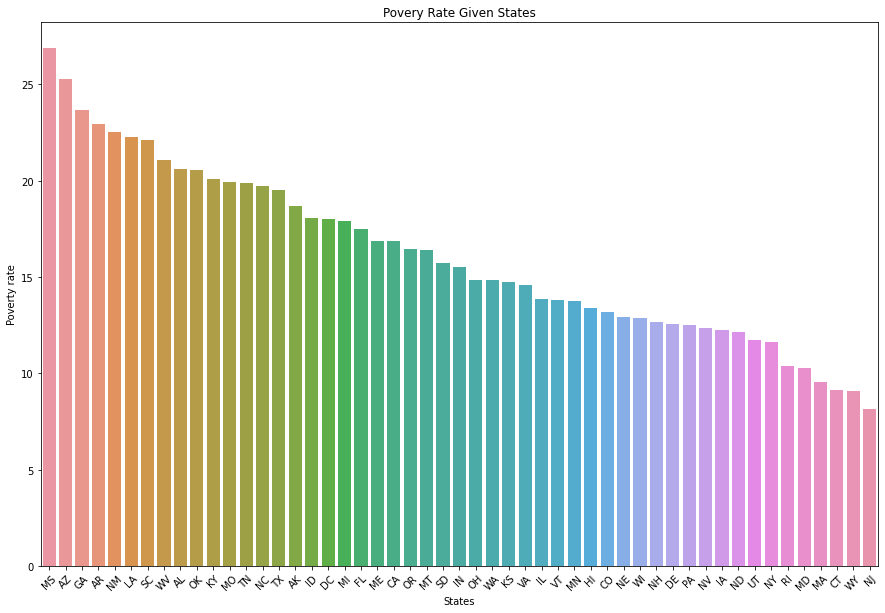

In [42]:
# visualization
plt.figure(figsize=(15,10))  #yeni bir figure açtık
ax=sns.barplot(x=sorted_data['area_list'],y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation=45) #x exsenindeki yazıların konumunu(rotation) degistirmek için
plt.xlabel("States")
plt.ylabel("Poverty rate")
plt.title("Povery Rate Given States")
plt.show()

şimdi öldürülen insanların arasında en yaygın olan 15 isime bakacağız:

In [43]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [44]:
kill.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

49 tane TK TK adlı isim var böyle bir isim olmayacağınına göre ignore etmemiz gerekiyor.

In [53]:
separate=kill.name[kill.name != 'TK TK'].str.split() #TK TK hariç ad ve soyadları birbirinden ayırdım
a,b =zip(*separate) # artık a'nın içinde isimler b'nin içinde soyisimler var.
name_list=a+b #isim ve soy isimleri iceren bir tuple yarattım.

In [56]:
from collections import Counter
name_count = Counter(name_list) #hangi isimden ve soyisimden kaç tane olduğunu tespit ettik.

In [57]:
most_common_names=name_count.most_common(15)
most_common_names

[('Michael', 91),
 ('David', 57),
 ('James', 56),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('J.', 32),
 ('Anthony', 31),
 ('Jose', 28),
 ('Joshua', 28)]

<strong>most_common(15)</strong> ile en çok bulunan 15 isim ve soyisimleri tespit ettik.

In [60]:
x,y=zip(*most_common_names) 
x,y=list(x),list(y) #x'e isim veya soyismi y'ye ise adedini attık.

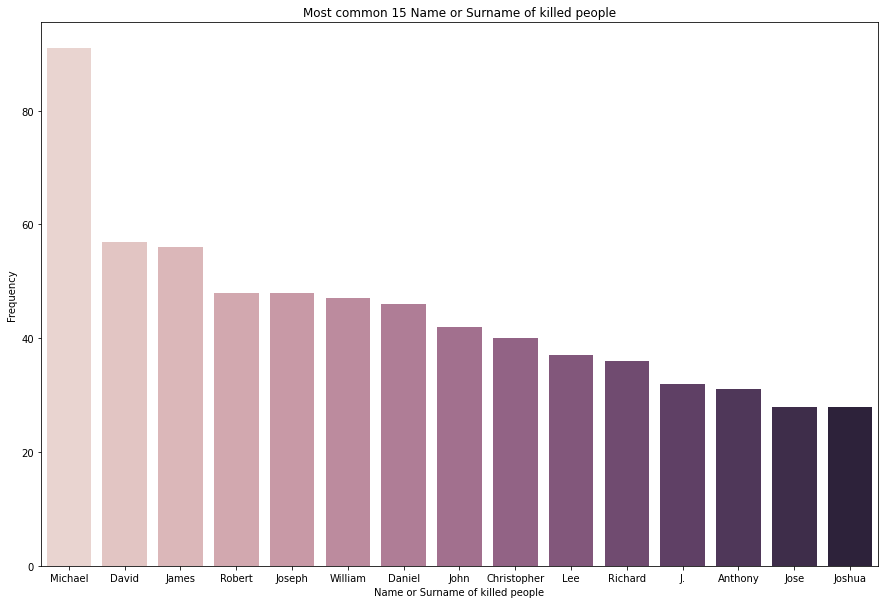

In [66]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=x,y=y, palette=sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')
plt.show()

<strong> palette=cubehellix_palette(len(x)))</strong> içine aldığı degiskenin uzunluk sayısı kadar grafiğe birbiriyle uyumlu renk verir .

<h3>25 yaşından büyük insanların eyaletlere göre liseden mezun olma oranını hesaplayacağız:</h3>

In [76]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [80]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

" - " degerleri 0 yapalım:

In [81]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace=True)

In [82]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


percent_completed_hs string oldugu icin onun tipini değiştirmemiz gerekecek:

In [83]:
percent_over_25_completed_highSchool.percent_completed_hs=percent_over_25_completed_highSchool.percent_completed_hs.astype(float)

In [84]:
area_list=list(percent_over_25_completed_highSchool['Geographic Area'].unique())

area_list'e benzersiz olan Geographic Area'ları attık.

In [86]:
area_highschool=[]
for i in area_list:
    x=percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_school_rate=sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_school_rate)

- area_list'in içindeki benzersiz Geographic Area'ları tek bir x degerine koyarak,
- her bir area'nın ortalamasını aldık,
- bunu bir list'e kaydettik.

In [90]:
data=pd.DataFrame({'area_list':area_list,'area_highschool_ratio':area_highschool})
new_index=(data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2=data.reindex(new_index)

- area_list ve area_highschool_ratio adlı feature'lara sahip bir data frame olusturduk,
- area_highschool_ratio 'ya göre artan şekilde sıraladık ve bunların index value'larını bir degiskene attık,
- yeni bir degiskene oluşturduğumuz new_index'e göre reindex yaparak indexleri sıraladık ve bunu sorted_data'ye kaydettik.

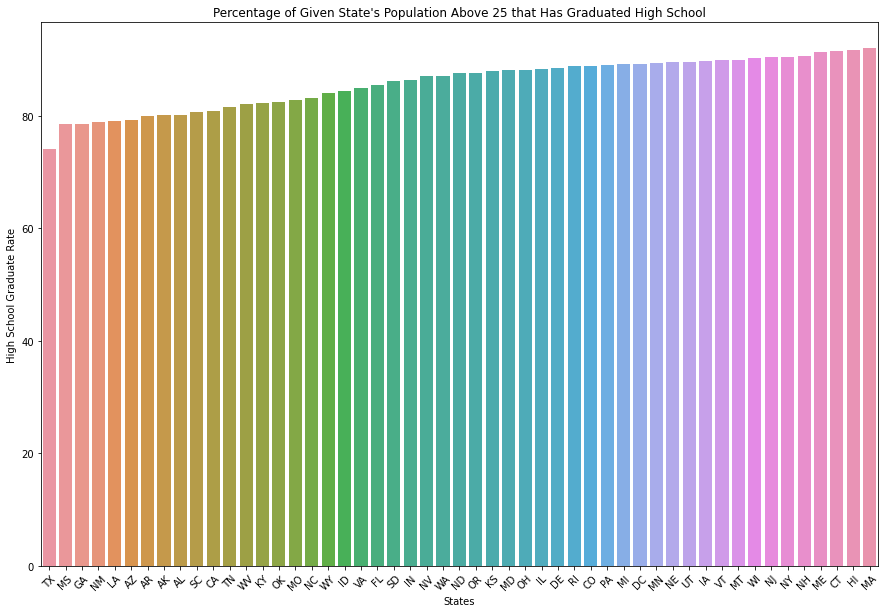

In [91]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data2['area_list'],y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")
plt.show()

<h3>Yatay Bar Plot</h3> <br>
<strong>Siyah, beyaz, kızılderili, asyalı ve İspanyol ırklarına göre eyalet nüfusunun yüzdesi'ni hesaplayacağız:</strong>

In [94]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [102]:
share_race_city.value_counts()

Geographic area  City                 share_white  share_black  share_native_american  share_asian  share_hispanic
AK               Adak city            19.6         4            5.5                    52.5         8.9               1
OH               Galion city          97.6         0.5          0.1                    0.2          1.3               1
                 Gahanna city         82.1         11.2         0.2                    3.1          2.6               1
                 Fultonham village    100          0            0                      0            0                 1
                 Fulton village       96.9         0            0                      0            1.9               1
                                                                                                                     ..
KS               Westwood Hills city  94.4         1.7          0                      1.9          3.1               1
                 Westphalia city      90.2   

In [95]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [120]:
share_race_city.replace(['(X)'],0.0,inplace=True)
share_race_city.replace(['-'],0.0,inplace = True)

In [121]:
share_race_city.share_white=share_race_city.share_white.astype(float)
share_race_city.share_black=share_race_city.share_black.astype(float)
share_race_city.share_native_american=share_race_city.share_native_american.astype(float)
share_race_city.share_asian=share_race_city.share_asian.astype(float)
share_race_city.share_hispanic=share_race_city.share_hispanic.astype(float)

yukarıdakinin yerine yazabileceğimiz kısa yol: <br>
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float) 

In [122]:
area_list=list(share_race_city['Geographic area'].unique())

In [123]:
share_white=[]
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]

In [124]:
for i in area_list:
    x=share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))

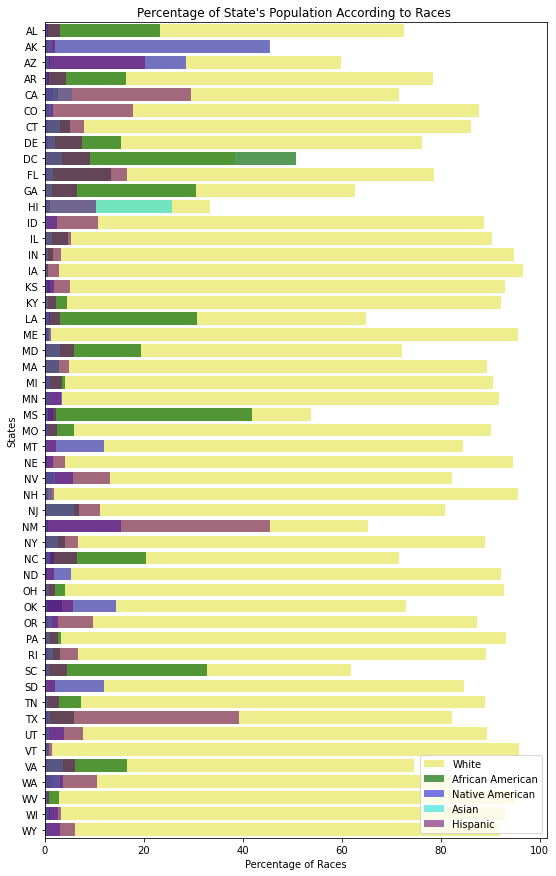

In [129]:
#visualization
f,ax=plt.subplots(figsize=(9,15))
sns.barplot(x=share_white,y=area_list,color='yellow',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='green',alpha=0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='blue',alpha=0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='cyan',alpha=0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='purple',alpha=0.6,label='Hispanic')


ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")
plt.show()
#frameon=True legend'ın arkasındaki beyazlığın olmasını sağlıyor eğer false olursa trasparan olur.

<h3>Point Plot</h3>

<strong>Eyaletlerdeki liseden mezun olma oranı ve fakirlik oranı karşılaştırması:</strong>

sorted_data'da eyaletlere göre yoksulluk oranı varken sorted_data2'de ise eyaletlere göre liseden mezun olma oranları var, <br>
iki datada değerler farklı aralıklarda oldugu için normalizasyon yapacağız ve 
değerleri 0 ila 1 arasına koyacağız:

In [152]:
sorted_data['area_poverty_ratio']=sorted_data['area_poverty_ratio']/max(sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio']=sorted_data2['area_highschool_ratio']/max(sorted_data2['area_highschool_ratio'])

In [156]:
data=pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
#concat benim için ortak olan area_list'e göre area_poverty_ratio ve area_highschool_ratio'u birleştirdi.
data.sort_values('area_poverty_ratio',inplace=True)

In [157]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


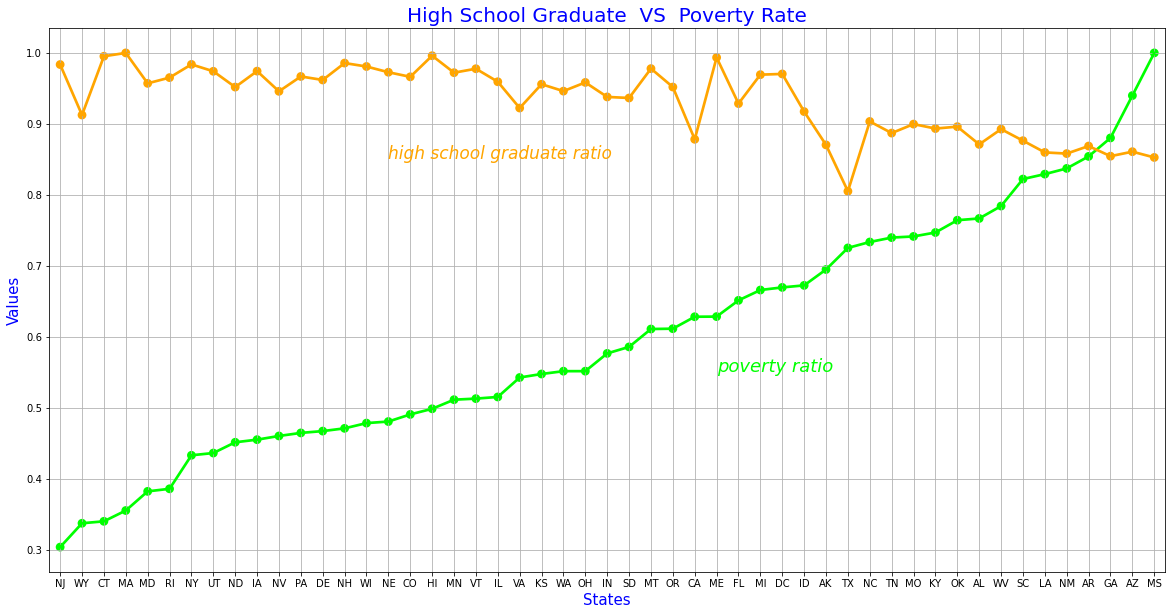

In [169]:
#visualize
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8) #alpha=saydamlık
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='orange',alpha=0.8)
plt.text(15,0.85,'high school graduate ratio',color='orange',fontsize = 17,style = 'italic') 
plt.text(30,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()
#matplotlib ile figure olusturuyoruz label ve titleları da matplotlib ile hallediyoruz ve veriyi seaborn kullanarak
#çizdiriyoruz.

plt.text(15,0.85,'high school graduate ratio',color='orange',fontsize = 17,style = 'italic') <br>
burada text'in x ve y üzerindeki konumu, text'in üzerinde ne yazacağı, rengi, text boyutu, stili belirleme işlemi sırasıyla yapıldı.


<h3>Joint Plot</h3>

<strong>Eyaletlerdeki liseden mezun olma oranı ve fakirlik oranı karşılaştırmasını joint plotla çizeceğiz</strong>

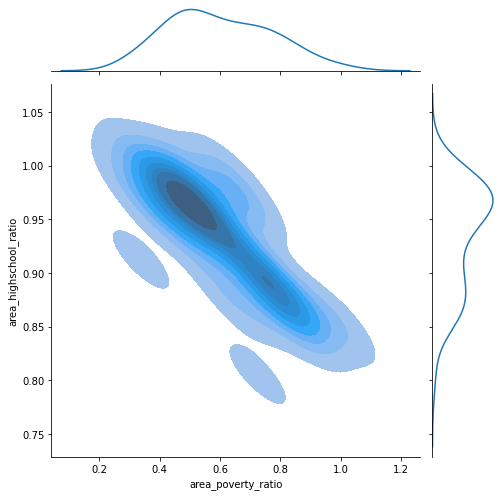

In [188]:
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7,shade=True)
plt.show()

- <strong>kde:</strong> plot'un dışındaki çizgilerdir, <br>
- fakirlik oranına bakacak olursak (üst taraftaki şekil) şeklin en yoğun oldugu yer yaklaşık olarak 0.5'e denk geliyor bu demek oluyor ki en çok 0.5'e yakın değerler var<br>
- liseden mezun olma oranı (yan taraftaki şekil) demek oluyor en yoğun oldugu deger ise yaklaşık 0,97 gibi.

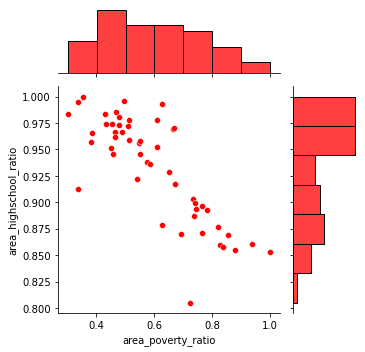

In [185]:
g=sns.jointplot("area_poverty_ratio","area_highschool_ratio",data=data,size=5,ratio=3,color="r")

<strong>ratio=3</strong> tüm plotta figure 3 yer kaplayacaksa histogramın olduğu dış kısım 1 yer kaplayacak, arttırdıkça histogram küçülmeye başlıyor. <br>
- açıkça görüldüğü gibi yoksulluk oranı arttıkça mezun olma oranı da artıyor.

<h3>Pie Plot</h3>

bu plot seaborn'un değil matplotlib'in görselleştirme plotu.

<strong>Öldürülenler arasındaki ırk oranına bakacağız:</strong>

In [192]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [252]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [ ]:
kill.race.dropna(inplace=True) #boş veya NaN olan değerleri datadan çıkart ve kaydet.

In [207]:
labels=kill.race.value_counts().index #indexlerini aldık yani ırkları.

In [208]:
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

- <strong>value_counts( )</strong> type olarak pandas.Series döndürür,<br>
- W,B,H,A,N,O <strong>index</strong> <br>
- 1201, 618, 423, 39, 31, 28 ise <strong>values</strong> <br>
olarak ulaşabiliriz yani, <br>
- kill.race.value_counts( ).values deseydim bana, <br>
- 201, 618, 423, 39, 31, 28 döndürecekti.


In [213]:
colors=['pink','yellow','orange','red','purple','brown']
explode=[0,0,0,0,0,0]
sizes=kill.race.value_counts().values

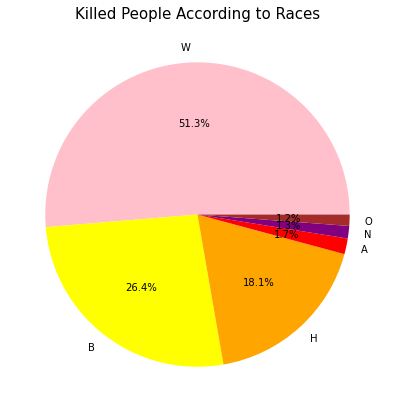

In [253]:
#visual 
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'black',fontsize = 15)
plt.show()

<strong>autopct='%1.1f%%' </strong> bir tane ondalıklı kısımdan göster demek 

<h3>Lm Plot</h3>

<strong>Liseden mezun olma ve yoksulluk oranını lm plot ile çizdireceğiz:</strong>

- linear regression'u gösterir.
- line datanın en optimum noktasından geçer.
- çizilen line'ın üzerinden yeni veriler için tahminde bulunabiliriz,
- mesela aşağıdaki şekilde 1.0 yoksulluk oranına baktıgımızda çizgi ile birleştiği noktadan y eksenine(liseden mezun olma oranı) doğru gidersek yaklaşık 0,85 değerinde olacağı tahmininde bulunabiliriz.

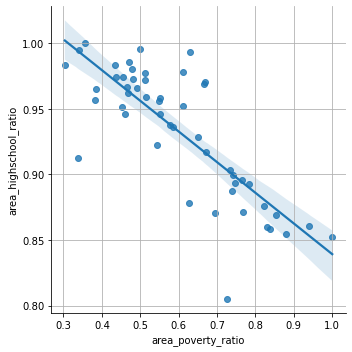

In [255]:
sns.lmplot(x="area_poverty_ratio",y="area_highschool_ratio",data=data)
plt.grid()
plt.show()

<h3>KDE Plot</h3> <br>
<strong>Yine liseden mezun olma ve yoksulluk oranına bakacağız:</strong>

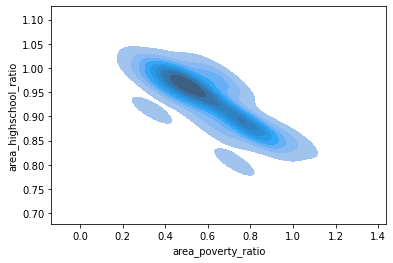

In [220]:
sns.kdeplot(data.area_poverty_ratio,data.area_highschool_ratio,shade=True,cut=5)  #cut=şeklin büyüklüğü ile ilgili
plt.show()

<h3>Violin Plot</h3>

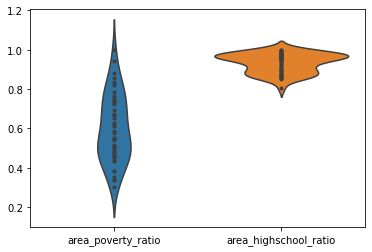

In [222]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3) #rengini seçtik googleyarak bir sürü seçenek bulabiliriz.
sns.violinplot(data=data,pallette=pal,inner="points")
plt.show()

- inner="points" şeklin içerisindeki noktalardır.
- mesela area_poverty_ratio şeklinde 0.30lu değer en aşağıdaki değer bir üstündeki değerde iki nokta birbirine çok yakın ikisi de 0.33 oldugu için.
- içine datayı verdik fakat eyaletleri görselleştirmedi çünkü sadece sayısal feature'ları görselleştiriyor.
- şekillerin en şişman oldugu yerler mesela area_poverty_ratio için 0.5 civarı en çok bulunan veri diyebiliriz.

In [223]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


<h3>HeatMap</h3> <br>
- data içerisindeki korelasyonu göstermek için kullanılır. <br>
<strong>Yine liseden mezun olma ve yoksulluk oranı arasındaki ilişkiye bakacağız:</strong>

- annot=True kareler içerisinde yazı olması,
- linewidths=.5 kareler arasındaki çizginin kalınlığı
- linecolor='red' kareler arasındaki çizginin rengi 
- fmt='.1f' karelerin içinde ondalıktan sonra kaç karakter olacağı
- ax=ax yarattığım plot'un (f,ax=plt.subplots(figsize=(5,5))) içine heatmap'i koyacağım demek

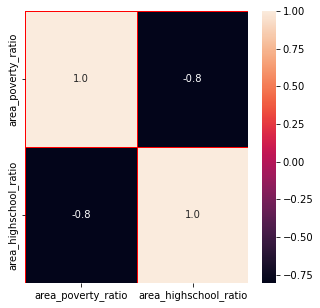

In [229]:
f,ax=plt.subplots(figsize=(5,5))#figure oluşturduk
sns.heatmap(data.corr(),annot=True,linewidths=.5,linecolor='red',fmt='.1f',ax=ax)
plt.show()

In [232]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


- area_highschool_ratio ve area_poverty_ratio arasında ters orantı olduğunu görüyoruz.
- (eksili şekilde 1'e yakın olduğu için aralarında ters orantı oldugunu söylüyoruz)

<h3>Box Plot</h3> <br>
öldürülen insanların,  <br>
- manner of death(ölüm şekli)'ne bakacağız: ateş edilerek veya şok tabancasıyla, <br>
aynı zamanda, <br>
- cinsiyet (gender) ve <br> 
- yas (age)'ine de bakmak istiyorum <br>
böyle durumlarda box plot kullanabiliriz.

In [233]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


- seaborn boxplot verdiğimiz x,y ve hue feature'larından unique olan verileri belirliyor. <br>
- mesela gender'ı verdiğimizde M ve F olarak görselleştirilmiş çünkü başka çeşit veri yok. <br>
- <strong>hue</strong> ise görselleştirmeyi manner_of_death'e göre yapmasını sağlıyor ve yine unique olan verilere göre bir şekil ve sınıflandırma sağlıyor

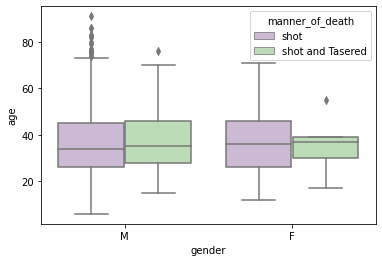

In [234]:
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

- kutuların içerisindeki çizgiler median değerini gösteriyor <br>
- noktalar outlier'ı temsil ediyor. 

In [236]:
 kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


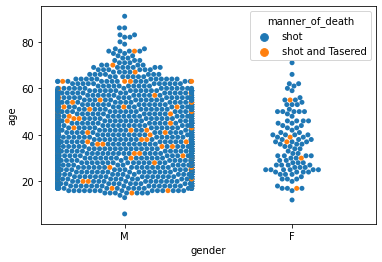

In [241]:
sns.swarmplot(x="gender",y="age",hue="manner_of_death",data=kill)
plt.show()

classification algoritmalarında kullanmak iyi oluyor,
yaşa göre kadın ve erkeğin, vurulma şekli olarakta nasıl oldugunu kolayca görebiliyoruz.

<h3>Pair Plot</h3>

<strong>liseden mezun olma oranı ve yoksulluk oranına bakacağız:</strong>

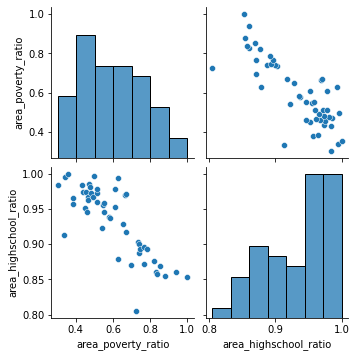

In [244]:
sns.pairplot(data)
plt.show()

- datamdaki sayısal değerleri plot ettiriyor,<br>
- hem histogram hemde scatter plot gösteriyor <br>
- yukarıdaki histogramda sadece area_poverty_ratio'nun histogramını görüyoruz,<br>
- aşağıdaki scatterda area_poverty_ratio ve area_highschool_rationun scatter'ını görüyoruz.
- yukarıdaki scatterda area_poverty_ratio ve area_highschool_rationun scatter'ını görüyoruz.
- aşağıdaki histogramda area_highschool_ratio'nun histogramını görüyoruz.


<h3>Count Plot</h3>

In [246]:
kill.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

yukarıdaki bilgiyi görselleştirmek için count plot kullanacağız:


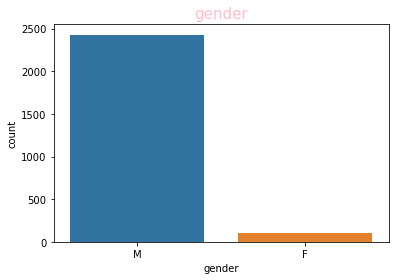

In [262]:
sns.countplot(kill.gender)
plt.title("gender",color="pink",fontsize=15)
plt.show()

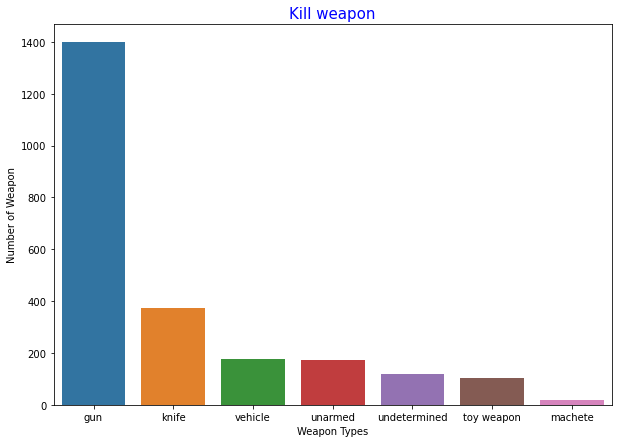

In [263]:
armed=kill.armed.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Age of killed people')

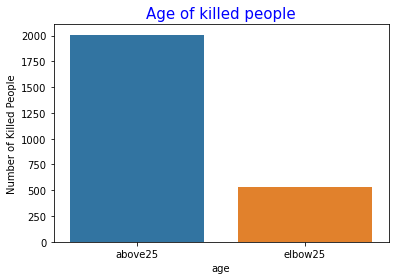

In [256]:
above25=['above25' if i>=25 else 'elbow25' for i in kill.age]
df=pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

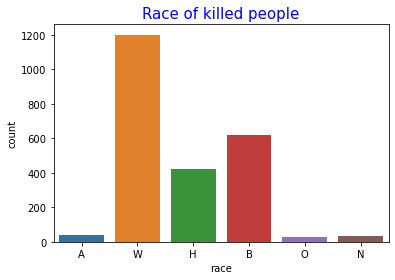

In [258]:
sns.countplot(data=kill,x='race')
plt.title('Race of killed people',color='blue',fontsize=15)
plt.show()

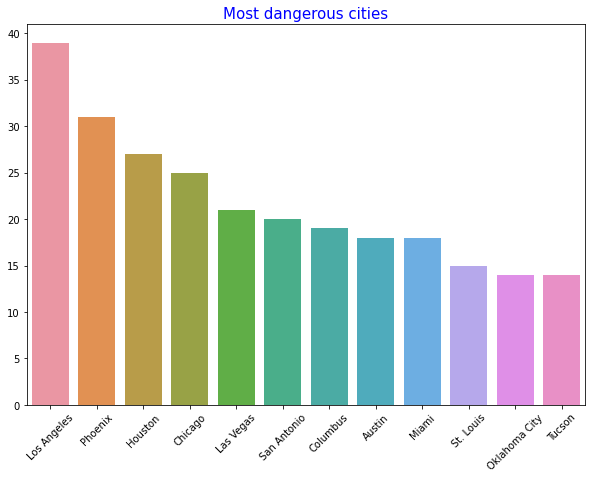

In [261]:
#en tehlikeli şehirler
city=kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title("Most dangerous cities",color="blue",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Most dangerous state')

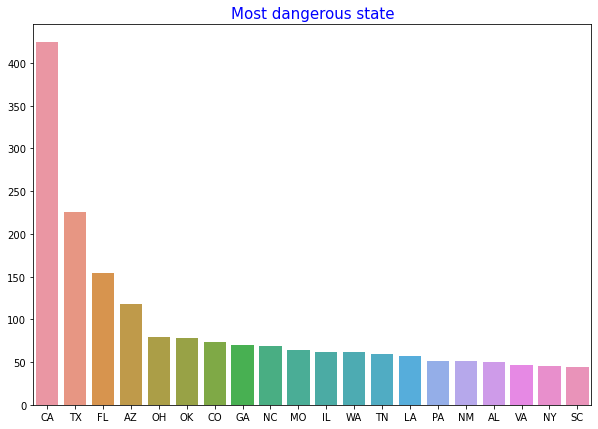

In [264]:
# en tehlikeli eyaletler
state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Most dangerous state',color = 'blue',fontsize=15)

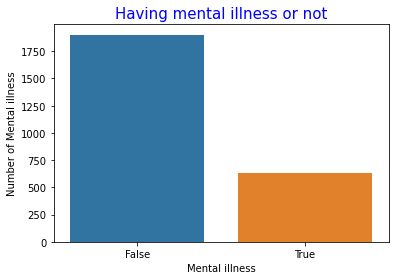

In [266]:
#öldürülen insanların akıl hastası olup olmaması
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)
plt.show()

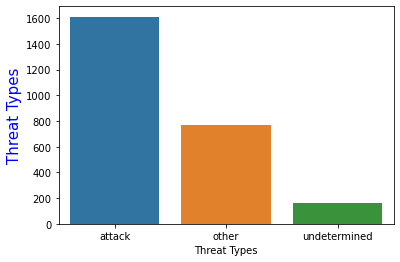

In [268]:
#tehdit çeşitleri
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.ylabel('Threat Types',color='blue',fontsize=15)
plt.show()

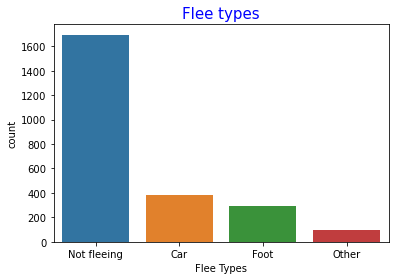

In [270]:
#kaçma türleri
sns.countplot(kill.flee)
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)
plt.show()

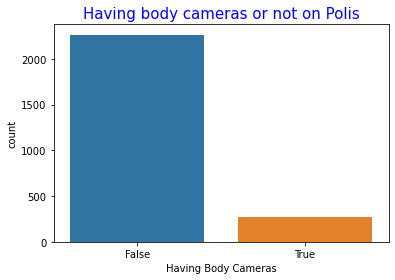

In [273]:
#polislerin vücut kamerası var mıydı?
sns.countplot(kill.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Polis',color='blue',fontsize=15)
plt.show()

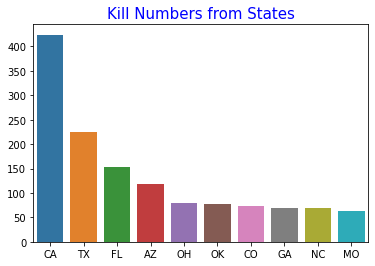

In [275]:
#Eyaletlere göre ölüm sayısı
sta = kill.state.value_counts().index[:10]
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)
plt.show()